# "The good data in Madrid continues"
> "The regional authority tweeted out an upbeat graphic. Was it designed to send the wrong message?"

- toc: true
- badges: true
- comments: true
- categories: [Madrid, Covid19, disinformation]
- image: images/barchart-preview.png


In [75]:
#hide
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [76]:
#collapse-hide
import pandas as pd
import re

import matplotlib.pyplot as plt

import plotnine
from plotnine import *

import warnings
warnings.filterwarnings('ignore')

On 3rd October 2020, the official account of the regional authority of Madrid put out a series of tweets under the ending **The good data in Madrid continues**. Here we will attempt to reproduce the first graphic and statistics and reflect if this communicates an appropriate message. 

This has also been covered by [El Diario](https://www.eldiario.es/rastreador/madrid-realmente-doblegando-curva-datos-no-muestran-tuits-triunfalistas-ayuso_1_6264894.html) _¿Está Madrid realmente doblegando la curva? Los datos que no muestran los tuits triunfalistas de Ayuso_

> twitter: https://twitter.com/ComunidadMadrid/status/1312359537526149121


_'La evolución de los casos diagnosticados durante la semana de 21 al 27 de septiembre es un **25% inferior** a los de la semana del 14 al 20 de septiembre.'_

'The evolution of the cases diagnosed during the week of September 21 to 27 is **25% lower** than those of the week of September 14 to 20.'

The graph includes the annotation of **-24.6%**. The first challenge is to generate this statistic.

In [77]:
def find_statistic(date,a,b):
  return print('report {}, total week 1: {}, total week 2: {}, % change: {}'.format(date,sum(a),sum(b),100*(-1+sum(b)/sum(a))))

In [78]:
find_statistic('El Diario', [26781], [20206])

report El Diario, total week 1: 26781, total week 2: 20206, % change: -24.550987640491396


## Daily reports from the regional health authority

From the [daily report](https://www.comunidad.madrid/sites/default/files/doc/sanidad/201002_cam_covid19.pdf) from the regional authority for 2 October 2020, the cases diagnosed for these two weeks were 

In [79]:
sept_14_20=[2148,5562,5101,4965,6658,1615,1011]
sept_21_27=[1956,4617,4206,3852,4508,1194,770]
find_statistic('2 Oct',sept_14_20,sept_21_27)

report 2 Oct, total week 1: 27060, total week 2: 21103, % change: -22.0140428677014


Let's have a look at earlier reports and see if we can get closer to **-24.6%**.

In [80]:
sept_14_20=[2145,5550,5089,4934,6643,1608,1008]
sept_21_27=[1949,4600,4190,3834,4461,1188,768]
find_statistic('1 Oct',sept_14_20,sept_21_27)

report 1 Oct, total week 1: 26977, total week 2: 20990, % change: -22.192979204507544


In [81]:
sept_14_20=[2139,5550,5072,4917,6633,1601,1001] 
sept_21_27=[1941,4580,4152,3818,4325,1109,743]
find_statistic('30 Sept',sept_14_20,sept_21_27)

report 30 Sept, total week 1: 26913, total week 2: 20668, % change: -23.20439936090365


In [82]:
sept_14_20=[2133,5460,5057,4897,6605,1591,996]
sept_21_27=[1932,4550,4100,3727,3741,980,694]
find_statistic('29 Sept',sept_14_20,sept_21_27)

report 29 Sept, total week 1: 26739, total week 2: 19724, % change: -26.235087325629237


In [83]:
sept_14_20=[2129,5448,5046,4885,6583,1584,984]
sept_21_27=[1906,4498,3844,3236,3078,769,457]
find_statistic('28 Sept',sept_14_20,sept_21_27)

report 28 Sept, total week 1: 26659, total week 2: 17788, % change: -33.27581679732923


The variation in the percentage change is due to the series for the daily figures changing as the information is backfilled. The daily reports of cases confirmed by PCR are updated as new cases are notified. They are allocated to the date on which the test was taken.

_Casos positivos de Covid-19 confirmados por PCR_

_La Comunidad de Madrid consolida diariamente la serie de casos confirmados por PCR, asignando a los casos nuevos notificados la fecha en la que se toma la muestra. Se realiza una actualización diaria de la serie de casos que se adjunta._

Looking at the latest date:

In [84]:
sept_14_20=[2161,5591,5123,4963,6696,1622,1027]
sept_21_27=[1985,4659,4248,3880,4572,1219,791]
find_statistic('6 Oct',sept_14_20,sept_21_27)

report 6 Oct, total week 1: 27183, total week 2: 21354, % change: -21.443549277121733


Based on the regional authorities latest daily figures the % change between the two weeks is **-21.4%**. Falling from 27_183 positive PCRs to 21_354 positive PCRs in a week. 

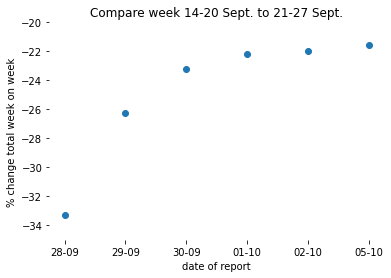

In [85]:
#collapse-hide
plt.scatter(['28-09','29-09','30-09','01-10','02-10','05-10'],[-33.28,-26.24,-23.20,-22.19,-22.01,-21.54,])
plt.xlabel('date of report')
plt.ylabel('% change total week on week')
plt.ylim(-35,-20)
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Compare week 14-20 Sept. to 21-27 Sept.');

## Weekly reports from the regional health authority

Table 1 of the weekly epidemiological report for week 39 (provisional data) contains data similar to that shown in the tweet.

| |Week 36 |Week 37 |Week 38|Week 39|
|---|---|---|---|---|
|Dates|31-08 - 06-09|07-09 - 13-09 |14-09 - 20-09 |21-09 - 27-09|
|Total|  19665| 24402  |  28685 |  21981 |
|Change| |1,24  |  1,18 | 0,77  |








In [86]:
find_statistic('Weekly epidemiological',[28685],[21981]) 
# https://www.comunidad.madrid/sites/default/files/doc/sanidad/epid/informe_epidemiologico_semanal_covid.pdf
# Week 39 provisional data

report Weekly epidemiological, total week 1: 28685, total week 2: 21981, % change: -23.371099877985014


Let's look at the weekly data provided by the regional authority for municipalities and districts.

In [87]:
munis_df=pd.read_csv('./fastpages/covid19_tia_muni_y_distritos_s.csv', delimiter=';', encoding='latin')
munis_df.fecha_informe=munis_df.fecha_informe.apply(lambda x: x[5:10])
munis_df.casos_confirmados_totales=munis_df.casos_confirmados_totales.fillna(0).astype('int')
munis_df[['municipio_distrito','fecha_informe','casos_confirmados_totales']].head()

,municipio_distrito,fecha_informe,casos_confirmados_totales
0,Madrid-Retiro,09/29,3940
1,Madrid-Salamanca,09/29,4770
2,Madrid-Centro,09/29,4820
3,Madrid-Arganzuela,09/29,5293
4,Madrid-Chamartín,09/29,4543


In [88]:
df_casos=munis_df[['municipio_distrito','fecha_informe','casos_confirmados_totales']].pivot(index='municipio_distrito', columns='fecha_informe', values='casos_confirmados_totales')
df_casos=df_casos.fillna(0).astype('int')
df_casos.sort_values('09/29', ascending=False).head(5)

fecha_informe,05/26,06/02,06/09,06/16,06/23,06/30,07/07,07/14,07/21,07/28,08/04,08/11,08/18,08/25,09/01,09/08,09/15,09/22,09/29
municipio_distrito,,,,,,,,,,,,,,,,,,,
Madrid-Puente de Vallecas,3150,3199,3242,3279,3328,3344,3382,3424,3454,3523,3668,3997,4847,6190,7575,9033,10834,12628,14397
Madrid-Carabanchel,2798,2848,2883,2910,2943,2959,2991,3039,3073,3124,3293,3689,4442,5272,6289,7570,8840,10356,11656
Madrid-Ciudad Lineal,2315,2339,2373,2394,2406,2436,2480,2514,2542,2573,2663,2871,3233,3813,4559,5345,6569,7702,8527
Madrid-Latina,2890,2946,2982,3018,3055,3086,3104,3129,3166,3233,3344,3585,3995,4351,4777,5572,6189,7300,8202
Fuenlabrada,1626,1645,1659,1682,1699,1716,1733,1744,1783,1841,1957,2171,2663,3168,3960,4580,5608,6651,7703


In [89]:
find_statistic('weekly_report', [sum(df_casos.iloc[:,-2]-df_casos.iloc[:,-3])],[sum(df_casos.iloc[:,-1]-df_casos.iloc[:,-2])])

report weekly_report, total week 1: 29316, total week 2: 28164, % change: -3.9295947605403225


In [90]:
weekly_new_cases=[sum(df_casos.iloc[:,-i]-df_casos.iloc[:,(-i-1)]) for i in range(1,11)][::-1]; weekly_new_cases

[1311, 2835, 5586, 10549, 14681, 17299, 20086, 24374, 29316, 28164]

In [91]:
weekly_pct_change=[100*(-1+weekly_new_cases[i+1]/weekly_new_cases[i]) for i in range(1,len(weekly_new_cases)-1)];weekly_pct_change

[97.03703703703704,
 88.84711779448622,
 39.169589534553026,
 17.832572713030448,
 16.110757847274403,
 21.34820272826845,
 20.275703618609995,
 -3.9295947605403225]

It's not clear to me why working with the weekly municipality data there is only a 4% fall in the last week in the number of cases, far from the 25% we are looking for.

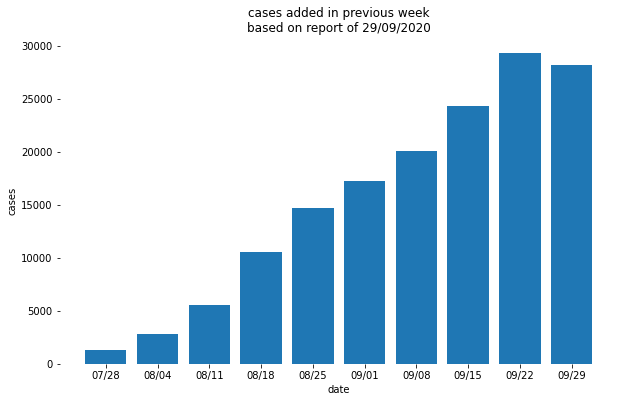

In [92]:
#collapse-hide
fig, ax = plt.subplots(1,1,figsize=(10,6))
plt.bar(df_casos.columns[-10:],weekly_new_cases)
plt.ylabel('cases')
plt.xlabel('date')
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('cases added in previous week\nbased on report of 29/09/2020');

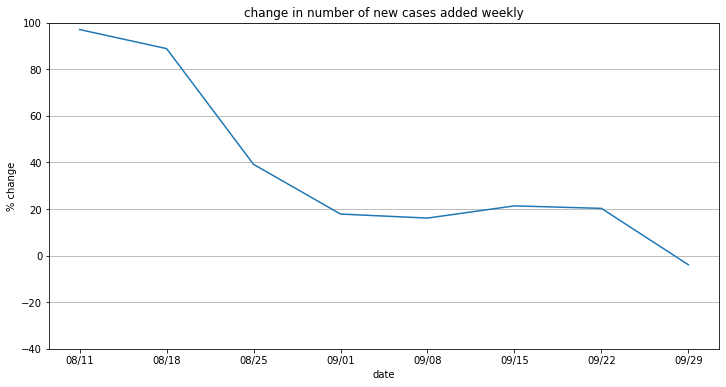

In [93]:
#collapse-hide
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.plot(df_casos.columns[-8:],weekly_pct_change[-8:])
plt.ylim(-40,100)
plt.grid(b=True, which='major', axis='y')
plt.xlabel('date')
plt.ylabel('% change')
plt.title('change in number of new cases added weekly');

## More on the daily reports from the regional health authority

In [94]:
daily_df=pd.read_excel('./fastpages/CAM_casos_diarios.xlsx', skipfooter=18).rename(columns={'Unnamed: 0':'fecha'})
daily_df.cumul_casos_201006.tail()
# Excel created by hand from the daily pdf reports

80    257145.0
81    257849.0
82    258102.0
83    259322.0
84         NaN
Name: cumul_casos_201006, dtype: float64

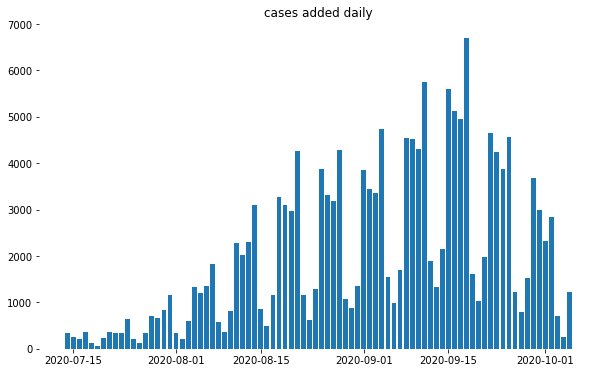

In [95]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
plt.bar(daily_df.fecha[:-1],daily_df.casos_201006[:-1])
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('cases added daily');

In [96]:
daily_df.fecha=daily_df.fecha.apply(lambda x: str(x)[5:10])
weekly_df=daily_df.iloc[::7]
weekly_df.loc[:,'cases_added']=weekly_df.cumul_casos_201006.diff().fillna(0).astype('int')
weekly_df['percent_change']=100*weekly_df.cases_added.pct_change()
weekly_df.loc[weekly_df.index[:2],'percent_change']=0
weekly_df[['fecha','percent_change']]

,fecha,percent_change
0,07-14,0.000000
7,07-21,0.000000
14,07-28,66.260658
21,08-04,88.095238
28,08-11,64.323272
35,08-18,56.399621
42,08-25,31.090399
49,09-01,3.849711
56,09-08,13.163754
63,09-15,25.689833


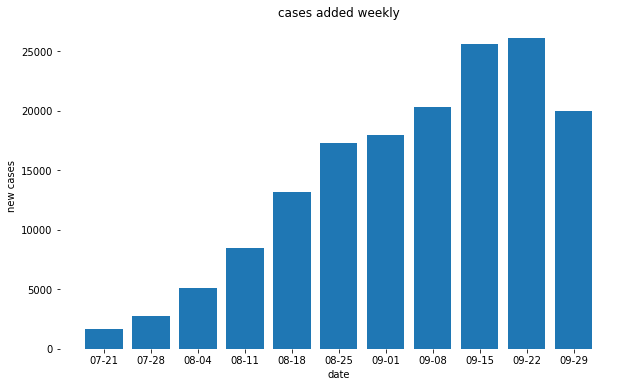

In [97]:
#collapse-hide
fig, ax = plt.subplots(1,1,figsize=(10,6))
plt.bar(weekly_df.fecha[1:-1],weekly_df.cases_added[1:-1])
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xlabel('date')
plt.ylabel('new cases')
plt.title('cases added weekly');

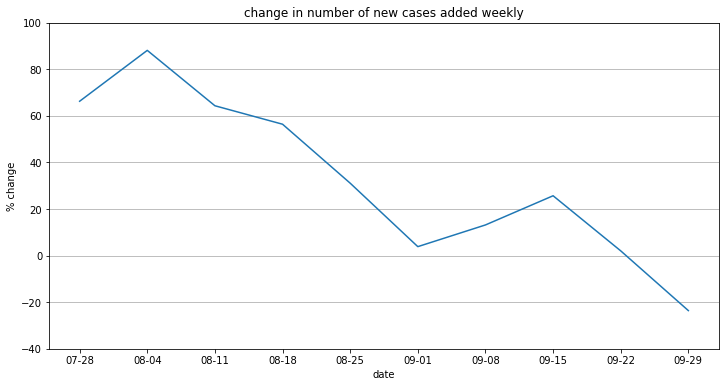

In [98]:
#collapse-hide
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.plot(weekly_df.fecha[2:-1],weekly_df.percent_change[2:-1])
plt.ylim(-40,100)
plt.grid(b=True, which='major', axis='y')
plt.xlabel('date')
plt.ylabel('% change')
plt.title('change in number of new cases added weekly');

Using the daily reports we get close to reproducing the graphic tweeted out. This graphic shows the percentage change between the total number of new cases in one week compared to the previous week. It is a measure of change but in this context is very misleading.

A simple bar chart shows not only the change in the number of cases but also the magnitude of the problem. If cases double in a week from 100 to 200 the change is 100% but you have some possibility of tracing the contacts of 200 people. Once you have 25_000 new cases in a week, even if there are 'only' 25_000 new cases the following week (so 0% change) you have a major problem.

## Hospital data since September

With the number of new daily cases there should be a fall in the number of people hospitalized, although with a time lag. Is this already a pattern?

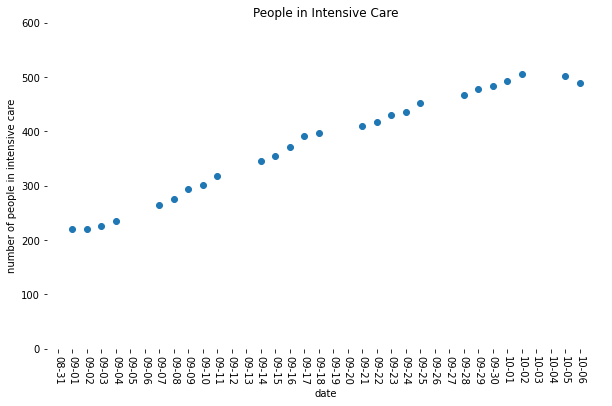

In [114]:
#collapse-hide
fig, ax = plt.subplots(1,1,figsize=(10,6))
plt.scatter(daily_df.fecha, daily_df.uci)
plt.xlabel('date')
plt.ylabel('number of people in intensive care')
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=270)
plt.ylim(0,600)
plt.title('People in Intensive Care');

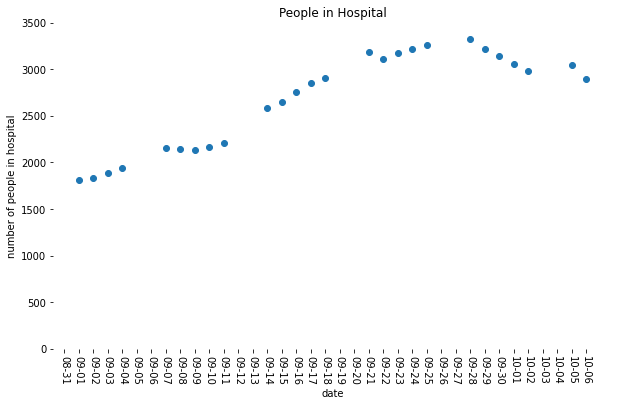

In [113]:
#collapse-hide
fig, ax = plt.subplots(1,1,figsize=(10,6))
plt.scatter(daily_df.fecha, daily_df.hospitalizados)
plt.xlabel('date')
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=270)
plt.ylim(0,3500)
plt.ylabel('number of people in hospital')
plt.title('People in Hospital');

Going in the right direction!